In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt 
import seaborn as sns 
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/sat-by-year-and-gender-1967-2001/SAT_by_Year_Gender_1967_2001.csv


In [2]:
df = pd.read_csv('/kaggle/input/sat-by-year-and-gender-1967-2001/SAT_by_Year_Gender_1967_2001.csv')
print(df.shape)
df.head(3)

(35, 10)


,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
0,1967,540,545,535,495,543,516,538,520,529
1,1968,541,543,533,497,543,516,537,520,528
2,1969,536,543,534,498,540,517,535,520,528


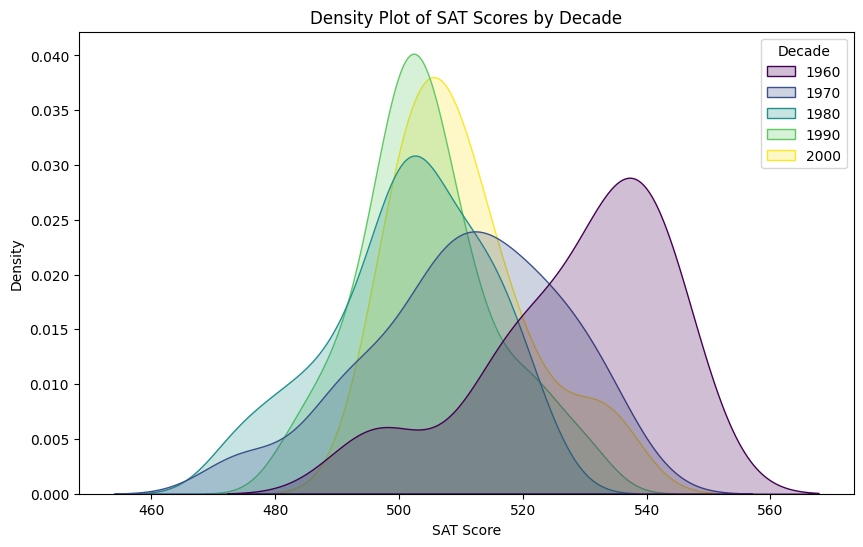

In [3]:
# Add a column for the decade
df['Decade'] = (df['Year'] // 10) * 10

# Reshape the DataFrame to have all SAT scores in one column
df_melted = df.melt(id_vars=['Year', 'Decade'], value_vars=['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math', 'M_averages', 'F_averages', 'A_averages'],
                    var_name='SAT_Type', value_name='Score')

# Plot density plot of SAT scores, grouped by decade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_melted, x='Score', hue='Decade', fill=True, common_norm=False, palette='viridis')
plt.title('Density Plot of SAT Scores by Decade')
plt.xlabel('SAT Score')
plt.ylabel('Density')
plt.show()

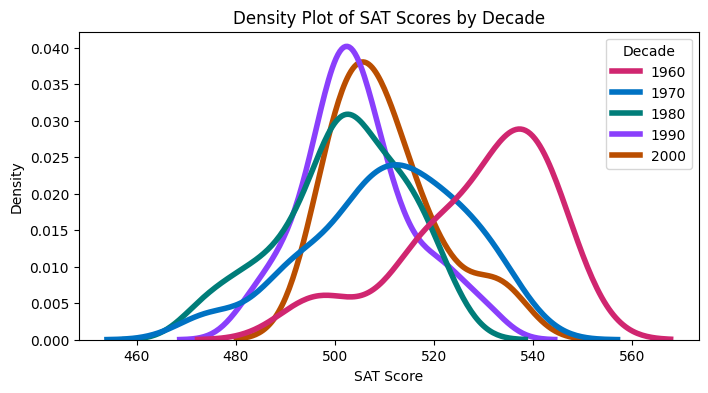

In [4]:
MY_PALETTE = [
    '#d02670', # pink
    '#0072c3', # blue
    '#007d79', # green
    '#8a3ffc', # violet
    '#ba4e00', # brown    
]

df['Decade'] = (df['Year'] // 10) * 10

# Reshape the DataFrame to have all SAT scores in one column
df_melted = df.melt(id_vars=['Year', 'Decade'], value_vars=['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math', 'M_averages', 'F_averages', 'A_averages'],
                    var_name='SAT_Type', value_name='Score')

# Plot density plot of SAT scores, grouped by decade
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_melted, x='Score', hue='Decade', fill=False, linewidth=4.0, common_norm=False, palette=MY_PALETTE)
plt.title('Density Plot of SAT Scores by Decade')
plt.xlabel('SAT Score')
plt.ylabel('Density')
plt.show()

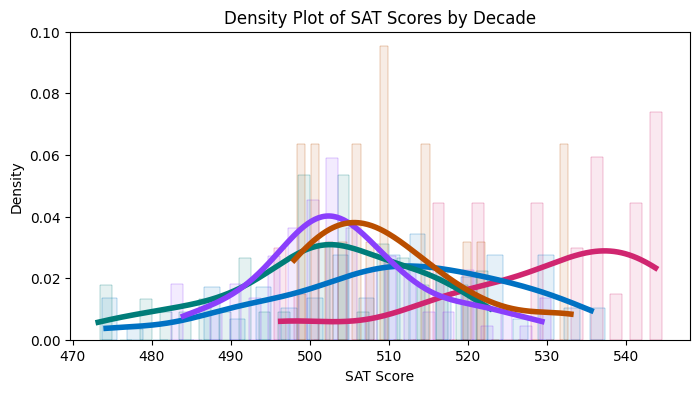

In [5]:
df_melted = df.melt(id_vars=['Year', 'Decade'], value_vars=['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math', 'M_averages', 'F_averages', 'A_averages'],
                    var_name='SAT_Type', value_name='Score')

plt.figure(figsize=(8, 4))

for i, decade in enumerate(df_melted['Decade'].unique()):
    sns.histplot(data=df_melted[df_melted['Decade'] == decade], x='Score', stat='density', common_norm=False,
                 color=MY_PALETTE[i], alpha=0.1, bins=20, linewidth=0.2, edgecolor=MY_PALETTE[i], shrink=0.6)

# Overlay density plots with 95% CI clipping for each decade
for i, decade in enumerate(df_melted['Decade'].unique()):
    ci_lower = df_melted[df_melted['Decade'] == decade]['Score'].quantile(0.025)
    ci_upper = df_melted[df_melted['Decade'] == decade]['Score'].quantile(0.975)
    
    # Plot KDE with clipping to the 95% CI range
    sns.kdeplot(data=df_melted[df_melted['Decade'] == decade], x='Score', fill=False, linewidth=4.0, 
                color=MY_PALETTE[i], clip=(ci_lower, ci_upper))


plt.title('Density Plot of SAT Scores by Decade')
plt.xlabel('SAT Score')
plt.ylabel('Density')
plt.show()